# Numpy-arrayer

## Introduktion

Hittills har vi använt listor för att manipulera serier av nummer (till exempel x och y för en graf). För att manipulera numren i dessa listor har vi behövt använda loopar.

Som exempel har vi extraherat data för UV-vis-spektrumet för en vattenmolekyl för att rita en graf:

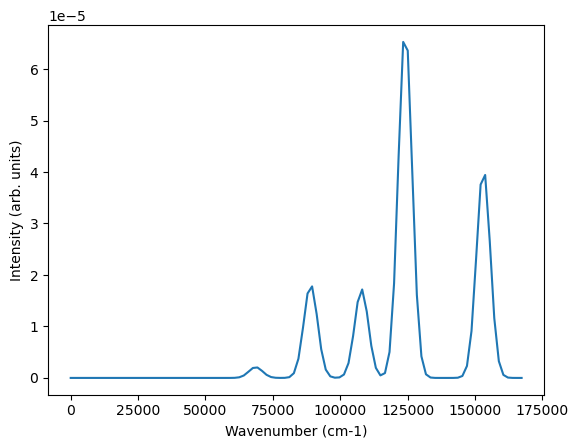

In [1]:
import matplotlib.pyplot as plt

# Läs data från en fil
energies = []
intensities = []
with open('water_spectrum.txt') as f:
    lines = f.read().splitlines()
    for line in lines:
        x,y = line.split(",")
        energies.append(float(x))
        intensities.append(float(y))

plt.figure()
plt.plot(energies, intensities)
plt.xlabel("Wavenumber (cm-1)")
plt.ylabel("Intensity (arb. units)")
plt.show()

**Övning:** Nu vill vi ändra enheterna från cm$^{-1}$ till eV (1 cm$^{-1}$ = 0,00012398 eV). Skriv en kod för att göra detta och rita resultatet:

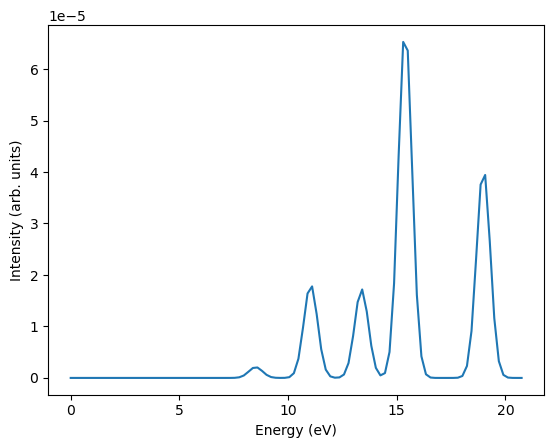

In [2]:
### BEGIN SOLUTION
energies_ev = []
for ene in energies:
    energies_ev.append(ene*0.00012398)

plt.figure()
plt.plot(energies_ev, intensities)
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.show()
### END SOLUTION

Det skulle ha varit frestande att helt enkelt multiplicera hela listan med konverteringskonstanten. Men listor är inte begränsade till bara nummer, och på grund av detta är deras inbyggda funktioner inte optimala för nummer. Kom ihåg till exempel vad som händer när du multiplicerar en lista med 2:

In [3]:
mylist = [0, 1, 2, 3, 4, 5]
print(mylist*2)

[0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5]


Detta är inte alls vad vi ville ha, men det är meningsfullt i listornas logik som en samling av objekt. Du har faktiskt duplicerat den samlingen.

Som tur är finns det ett bibliotek i python som är speciellt utformat för att hantera listor av nummer: numpy. Som för alla bibliotek behöver det importeras först. På grund av hur användbart det är, ges det ofta ett kortare namn "np".

In [4]:
import numpy as np

Nu kan vi gå tillbaka till vårt ursprungliga problem. Vi kan skapa en numpy array från en pythonlista:

In [5]:
myarray = np.array(mylist)
print(myarray)

[0 1 2 3 4 5]


Numpy-arrayer har flera viktiga skillnader jämfört med python-listor. De kan bara innehålla en enda variabeltyp (ingen blandad data) och har en fast längd. Det innebär att det, till skillnad från python-listor, är svårt att ändra storleken på dem. Internt, när en numpy-array ändrar storlek, måste python i stället skapa en kopia.

Å andra sidan är de lättare att manipulera i numerisk kontext, och ofta kan vi helt undvika loopar. Särskilt addition och multiplikation beter sig mycket annorlunda:

In [6]:
print(myarray * 2)
print(myarray / 3)
print(myarray + 1)

[ 0  2  4  6  8 10]
[0.         0.33333333 0.66666667 1.         1.33333333 1.66666667]
[1 2 3 4 5 6]


**Övning:** Gör om konverteringen av spektret, men använd nu en numpy-array (observera att matplotlib kan läsa både numpy-arrayer och python-listor).

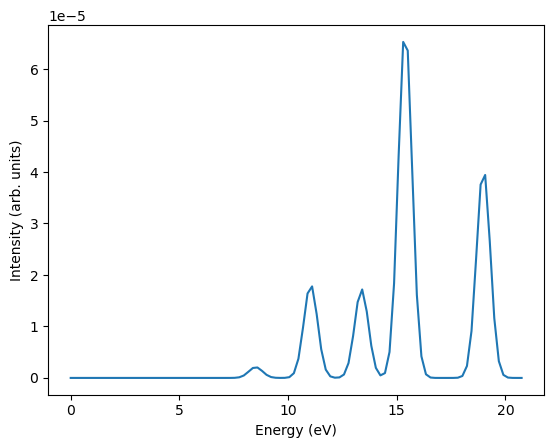

In [7]:
### BEGIN SOLUTION
np_energies_ev = np.array(energies) * 0.00012398
np_intensities = np.array(intensities)

plt.figure()
plt.plot(np_energies_ev, np_intensities)
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.show()
### END SOLUTION

## Skapa numpy-arrayer

Det finns flera sätt att skapa numpy-arrayer. Det första är att omvandla befintliga python-objekt, som vi redan har sett:

In [8]:
print(np.array([0,1,2,3,4,5]))
print(np.array((0,1,2,3,4,5)))
print(np.array(range(6)))

[0 1 2 3 4 5]
[0 1 2 3 4 5]
[0 1 2 3 4 5]


Men det finns också inbyggda funktioner i numpy för att skapa specifika arrayer:

In [9]:
print(np.zeros(10))  # en numpy-array med nollor av längd 10
print(np.ones(10))  # en numpy-array med ettor av längd 10
print(np.arange(10))  # en numpy-variant av range
print(np.arange(0, 10, 0.5))  # fungerar också med icke-heltalssteg
print(np.linspace(0, 10, 21))  # 21 jämnt fördelade tal mellan 0 och 10
print(np.random.rand(10))  # 10 slumpmässiga tal (som standard mellan 0 och 1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0 1 2 3 4 5 6 7 8 9]
[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
[0.37684662 0.07621978 0.28155839 0.38756252 0.24695617 0.3019723
 0.2692191  0.67526324 0.39434224 0.887712  ]


Till skillnad från listor kan numpy-arrayer bara innehålla element av samma typ. När en numpy-array skapas från en python-lista väljer den datatypen som passar allt. Du kan kontrollera datatypen för arrayen med egenskapen "dtype".

In [10]:
# Från heltal -> heltal
a = np.array([0, 1, 2])
print("från heltal:", a.dtype)

# Från flyttal -> flyttal
a = np.array([0.0, 1.0, 2.0])
print("från flyttal:", a.dtype)

# Från blandning av heltal och flyttal -> flyttal (mer generellt)
a = np.array([0, 1.0, 2])
print("från blandning heltal-flyttal:", a.dtype)

# Från booleans -> booleans
a = np.array([True, False, True])
print("från booleans:", a.dtype)

# Från blandning av heltal och booleans -> heltal (True betraktas som 1, False som 0)
a = np.array([True, False, 2])
print("från blandning:", a.dtype, "a =", a)

# Från strängar och tal -> strängar
a = np.array(["Hej", "världen", 1, 2])
print("från strängar och tal: a =", a)

från heltal: int64
från flyttal: float64
från blandning heltal-flyttal: float64
från booleans: bool
från blandning: int64 a = [1 0 2]
från strängar och tal: a = ['Hej' 'världen' '1' '2']


Du kan tvinga datatypen för arrayen genom att ange den eller konvertera den i efterhand.

In [11]:
array1 = np.array(range(10))
print(array1)

# Begär en float-array
array2 = np.array(range(10), dtype=float)
print(array2)

# Konvertera array1 till float
array3 = array1.astype(float)
print(array3)

# Att utföra matematik kommer också att fungera
array4 = array1 * 1.0
print(array4)

[0 1 2 3 4 5 6 7 8 9]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


Som tidigare förklarat rekommenderas det inte att ändra storleken på numpy-arrayer, eftersom det är ineffektivt för koden. Det är dock möjligt om det behövs.

In [12]:
a = np.arange(10)
print(a)
print(np.append(a, 10))

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  2  3  4  5  6  7  8  9 10]


# Åtkomst av numpy-arrayer

På många sätt beter sig numpy-arrayer som listor:

In [13]:
a = np.arange(0, 5, 0.5)
print(a)

# Mäta längd
print("Antal element i a:",len(a))

# Åtkomst med []
print("Element 2 är:",a[2])

# Kan loopas igenom
print("Listan över element är:")
for ax in a:
    print(ax)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
Antal element i a: 10
Element 2 är: 1.0
Listan över element är:
0.0
0.5
1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5


# Operationer

Vi har sett hur numpy-arrayer beter sig med addition och multiplikation, men det finns många fler operationer som kan göras, på liknande sätt som med vanliga tal.

In [14]:
a = np.arange(0, 5, 0.5)
print("a       =", a)
print("a mod 2 =", a%2)
print("a^2     =", a**2)
print("sqrt(a) =", np.sqrt(a))
print("cos(a)  =", np.cos(a))

a       = [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]
a mod 2 = [0.  0.5 1.  1.5 0.  0.5 1.  1.5 0.  0.5]
a^2     = [ 0.    0.25  1.    2.25  4.    6.25  9.   12.25 16.   20.25]
sqrt(a) = [0.         0.70710678 1.         1.22474487 1.41421356 1.58113883
 1.73205081 1.87082869 2.         2.12132034]
cos(a)  = [ 1.          0.87758256  0.54030231  0.0707372  -0.41614684 -0.80114362
 -0.9899925  -0.93645669 -0.65364362 -0.2107958 ]


Numpy innehåller också funktioner för att hitta minsta och största värdet samt medelvärdet av en array.

In [15]:
a = np.array([0,-2.0, 1.2, 3.5, 4.0, -0.5])
print("Min-värdet av a är",np.min(a), "och är element nummer", np.argmin(a))
print("Max-värdet av a är",np.max(a), "och är element nummer", np.argmax(a))
print("Medelvärdet av a är",np.mean(a))

Min-värdet av a är -2.0 och är element nummer 1
Max-värdet av a är 4.0 och är element nummer 4
Medelvärdet av a är 1.0333333333333334


**Övning:** Använd min/max-funktionerna för att omvandla y-axeln så att maxvärdet i spektret blir 1.

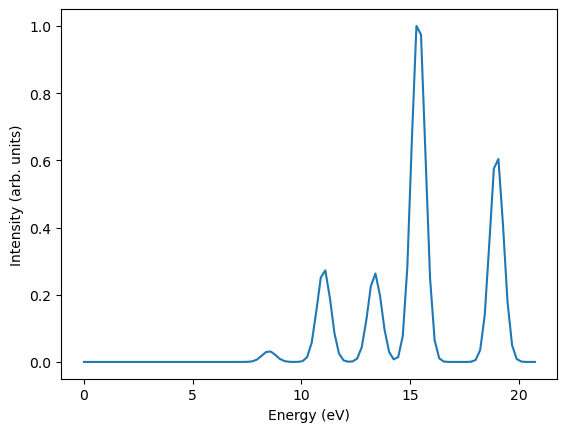

In [16]:
### BEGIN SOLUTION
int_max = np.max(np.array(intensities))
np_intensities = np.array(intensities)/int_max

plt.figure()
plt.plot(np_energies_ev, np_intensities)
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.show()
### END SOLUTION

# Högre dimensioner (matris)

Även om det kanske inte är lika användbart för en vanlig kemist är det också möjligt att använda numpy-arrayer med mer än 1 dimension, till exempel tabeller/matriser med siffror (2D). Detta kan vara mycket kraftfullt för linjär algebra exempelvis.

In [17]:
print(np.array([[0, 1],[2,3]]))
print(np.zeros( (10,10) ))
print(np.identity(5))

[[0 1]
 [2 3]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


För att komma åt ett specifikt element behöver du nu använda 2 index inom hakparenteserna `A[i,j]`. Om du bara anger ett index returnerar numpy hela raden. Det betyder att du också kan få ett element som `A[i][j]`.

In [18]:
A = np.array([[0, 1],[2,3], [4,5], [6,7]])
print(A)
print(A[2,0])
print(A[2])
print(A[2][0])

[[0 1]
 [2 3]
 [4 5]
 [6 7]]
4
[4 5]
4


Eftersom numpy-arrayer kan ha mycket olika former finns det också inbyggda funktioner för att hitta arrayens form.

In [19]:
print(len(A)) # detta ger bara längden på den första dimensionen (antalet rader)
print(A.shape) # detta ger både längd och bredd som en tuple

4
(4, 2)


Med hjälp av detta kan du skapa arrayer med samma form som en annan array.

In [20]:
print(np.zeros(A.shape))
print(np.zeros_like(A)) #Alternativ formulering men den här gången kontrolleras även vilken typ av element som finns i A (här heltal)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0 0]
 [0 0]
 [0 0]
 [0 0]]


# Slicing

Precis som för listor eller strängar är det möjligt att skiva numpy-arrayer:

In [21]:
a = np.arange(0, 10, 0.5)
print(a[:5])
print(a[15:])
print(a[10:15])
print(a[-6:-1])

[0.  0.5 1.  1.5 2. ]
[7.5 8.  8.5 9.  9.5]
[5.  5.5 6.  6.5 7. ]
[7.  7.5 8.  8.5 9. ]


Det är också möjligt att ta en lista av element:

In [22]:
indices = [0, 2, 5]
print(a[indices])

[0.  1.  2.5]


**Övning:** Använd detta för att ta bort den del av vattenspektret som motsvarar 0-5 eV (ungefär de första 25 punkterna).

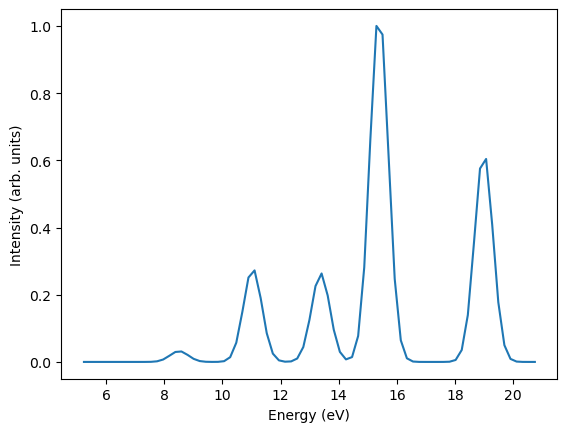

In [23]:
### BEGIN SOLUTION
plt.figure()
plt.plot(np_energies_ev[25:], np_intensities[25:])
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.show()
### END SOLUTION

Numpy-arrayer kan också skivas med hjälp av villkor:

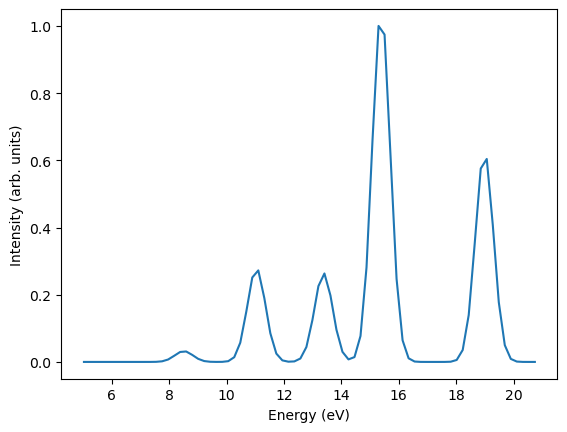

In [24]:
plt.figure()
plt.plot(np_energies_ev[np_energies_ev>5], np_intensities[np_energies_ev>5])
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.show()

Villkoret i sig blir en boolesk numpy-array som används som en "mask":

In [25]:
print(np_energies_ev>5)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


# Interpolation/Fitting

Utöver att erbjuda ett bekvämt format och en uppsättning funktioner för att manipulera listor med siffror, erbjuder numpy (liksom det relaterade biblioteket scipy) många funktioner för att utföra dataanalys, särskilt interpolation och anpassning.

Låt oss börja med interpolation, som kan vara användbart till exempel för att skapa snyggare kurvor från begränsade data.

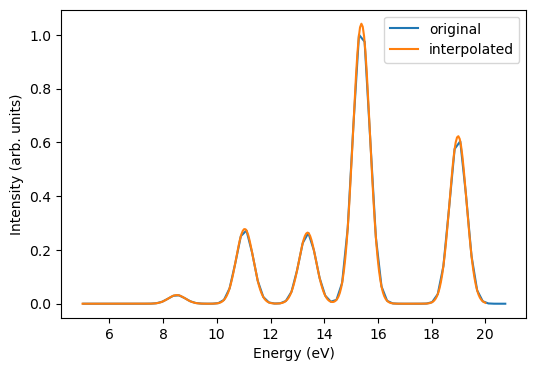

In [26]:
from scipy import interpolate

f = interpolate.interp1d(np_energies_ev, np_intensities, kind = "cubic") #Kubisk interpolation

new_energies = np.linspace(5,20,300) #300 punkter för ökad upplösning

plt.figure(figsize=(6, 4))
plt.plot(np_energies_ev[np_energies_ev>5], np_intensities[np_energies_ev>5], label = "original")
plt.plot(new_energies, f(new_energies), label = "interpolated")
plt.xlabel("Energy (eV)")
plt.ylabel("Intensity (arb. units)")
plt.legend()
plt.show()

nterpolation i praktiken innebär att passa in en kurva lokalt till ett polynom. Det kan dock vara mycket känsligt för brus.

Ofta vill vi passa in våra data i en analytisk funktion inte för att göra en figur snyggare, utan för att bestämma några fria parametrar i teorin. I dessa fall känner vi till formen (formeln) som vi förväntar oss att kurvorna ska ha, men vi saknar de fysikaliska parametrarna (reaktionshastighetskonstant, exciteringsenergi, NMR-skift, etc...), och genom att göra passningen kan vi hitta parametrarna och därmed få insikt i det kemiska problemet.

Numpy och scipy har flera funktioner för att göra detta. Ett av de enklare och mer flexibla alternativen är "curve_fit" i scipy. Här har vi till exempel en fördelning som vi förväntar oss ska ha en gaussisk form, men vi vill veta medelvärdet och spridningen. Vi ger också möjligheten att ha en vertikal förskjutning. Vi ger curve_fit den gaussiska funktionen med fria parametrar och scipy försöker hitta de parametrar som ger bästa passning.

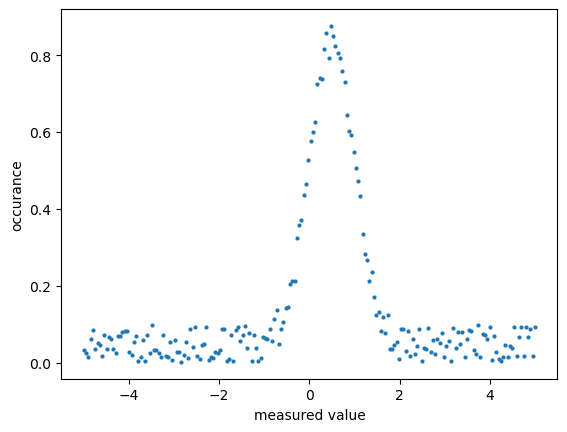

In [27]:
gauss = lambda x,mu=0,sigma=1,offset=0: 1/np.sqrt(2*np.pi*(sigma**2))*np.exp((-0.5/sigma**2)*((x-mu))**2)+offset
                                    
#Skapa lite data med lite slumpmässighet och plotta det
x=np.linspace(-5,5,200)
y=gauss(x,mu=0.5,sigma=0.5)+0.1*np.random.random(np.shape(x))

plt.figure()
plt.plot(x,y,'o',ms=2,label='data')
plt.xlabel('measured value')
plt.ylabel('occurance')
plt.show()

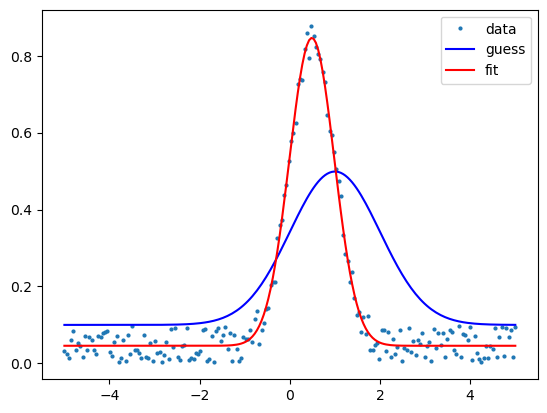

values: [0.48826587 0.49815261 0.04572213]
errors: [0.00597905 0.00488187 0.00201456]


In [28]:
from scipy.optimize import curve_fit

# Gör en initial gissning
p0=[1,1,0.1]

# Optimera
popt,pcov = curve_fit(gauss, xdata=x, ydata=y,p0=p0)

# Plotta båda
plt.figure()
plt.plot(x,y,'o',ms=2,label='data')
plt.plot(x, gauss(x, mu=p0[0],sigma=p0[1],offset=p0[2]), 'b-', label='guess')
plt.plot(x, gauss(x, mu=popt[0],sigma=popt[1],offset=popt[2]), 'r-', label='fit')
plt.legend()
plt.show()

# Hämta fel från kovariansmatrisen (fungerar här, men var försiktig)
perr = np.sqrt(np.diag(pcov))
print("values:", popt)
print("errors:", perr)

Vi ser att vi får ungefär det (0,5 0,5 0) som vi började med, men med oprecision på grund av bruset. Speciellt för förskjutningen får vi ungefär 0,05 vilket faktiskt är hälften av amplituden på bruset vi lade till. (Om du vill fejka data bör bruset ha medelvärdet 0: `0,1 * np.random.rand() - 0,05`)

**Övning:** Plotta kurvan i filen gaussian_fit.csv. Välj en passningsfunktion och använd den för att passa in kurvan.

In [29]:
### BEGIN SOLUTION
### END SOLUTION